In [80]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
import BruteForceOptimized as bfo
import AntColonyOptimized as aco
import vns as vns

import random
import copy
from matplotlib import pyplot as plt

In [81]:
def plot(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

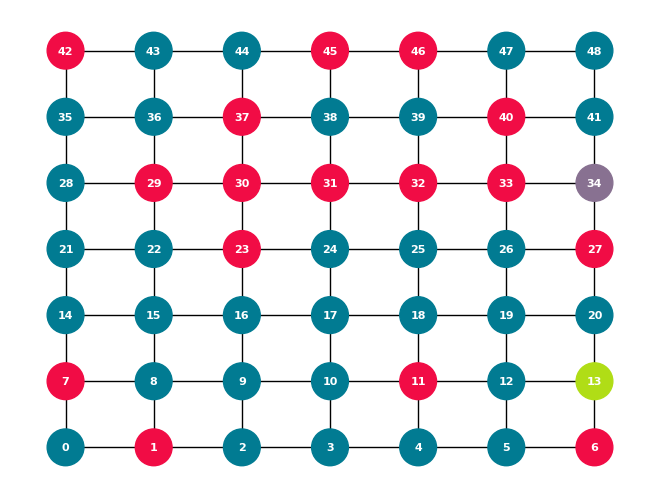

In [82]:
g, obstacles, start_pos, goal_pos = gg.build_grid(7)
obstacles_start = copy.deepcopy(obstacles)

In [83]:
num_iterations = 100
alpha = 0.9
beta = 1.5
theta = 100
num_ants = 50
rho = 0.9

# Brute Force:

In [84]:
metrics_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 27 was found in iteration 90
Time it took to finish the search: 0.147728
Obstacles moved: ['31->38', '27->26', '7->14', '33->39', '30->31', '11->18', '39->40', '18->19', '42->43', '46->36', '19->12', '14->7', '32->25', '31->44', '12->11', '11->10', '40->41', '39->32', '1->0', '44->37']
Best path of all iterations: ['34->33', '33->34', '34->41', '41->34', '34->27', '27->20', '20->13']


# Optimized brute

In [85]:
obstacles = copy.deepcopy(obstacles_start)
metrics_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 6 was found in iteration 9
Time it took to finish the search: 0.009279
Obstacles moved: ['6->5', '29->22', '40->39', '37->38', '31->24', '5->6', '11->18', '33->26', '42->43', '22->21', '23->22', '24->23', '32->33', '27->20', '30->31', '6->5', '22->29', '5->4', '46->47', '7->14', '39->40', '21->28', '38->39', '1->2', '31->38', '20->19', '39->32', '23->16']
Best path of all iterations: [34, 27, 20, 13]


# ACO

In [86]:
for edge in g.edges:
        g.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
        g.edges[edge]['weight'] = 1
    
obstacles = copy.deepcopy(obstacles_start)
metrics_aco = aco.aco(g, start_pos, goal_pos, num_ants, rho, num_iterations, theta, alpha, beta, obstacles)

Best score: 5
Time it took to finish the search: 0.298212
Obstacles moved: ['40->41', '27->26']
Best path: [34, 27, 20, 13]


# VNS

In [100]:
obstacles = copy.deepcopy(obstacles_start)
vns_params = {
    'time_limit': 2,
    'k_min': 1,
    'k_max': 3,
    'move_prob': 0.1,
}
metrics_vns = vns.vns(g, start_pos, goal_pos, obstacles, vns_params, num_iters = num_iterations)
print()
# result, result_value = vns.simulated_annealing(g, start_pos, goal_pos, obstacles, num_iters = 10000)

Best score: 6
Time it took to finish the search: 0.039218
Obstacles moved: ['20->19']
Best path: [True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, False, True, False, True, False, False, True, True, False, False]
Najmanje pomeraja prepreka:  3



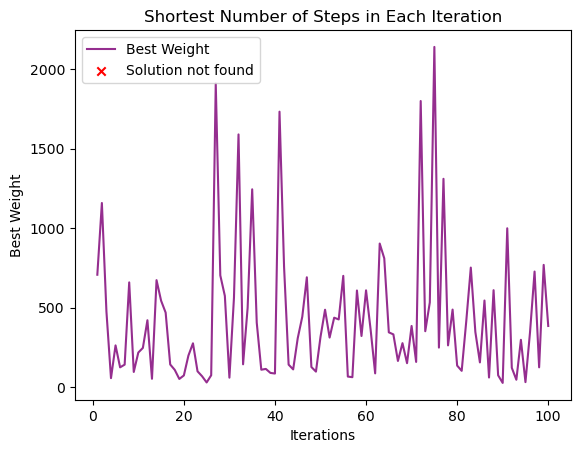

In [142]:
plot(num_iterations, metrics_bf["solution_values"])

In [102]:
# plot(num_iterations, metrics_bfo["solution_values"])

In [103]:
# plot(num_iterations, metrics_aco["solution_values"])

In [104]:
metrics = [metrics_bf, metrics_bfo, metrics_aco, metrics_vns]
name = ["bf", "bfo", "aco", "vns"]

In [105]:
def plot_solutions(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

In [106]:
best_values = [x["best_value"] for x in metrics]
times = [x["time"] for x in metrics]

In [149]:
def plot_metric(values, names, title):
    plt.figure(figsize=(14, 4))
    plt.bar(name, values)
    plt.grid(alpha = 0.5)
    
    for i, s in enumerate(values):
        plt.text(name[i], s, f'{s:.4f}', ha='center', va='bottom')
    
#     plt.ylim()
    plt.title(title)
    plt.show()

In [147]:
def plot_solutions(num_iterations):
    fig, axs = plt.subplots(2, 2, figsize = (10, 10))

    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    x = range(1, num_iterations+1)
    
    for i, ax in enumerate(axs.flat):
        if i == 3:
            continue
            
        indices = [j for j, value in enumerate(metrics[i]["solution_values"]) if value == -1]
        ax.scatter([j+1 for j in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
            
        color = random.sample(colors, k=1)[0]
        ax.plot(x, metrics[i]["solution_values"], color = color,)
        ax.set_title(name[i])
    
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Best Weight')
        if len(indices):
            ax.legend()
    
    plt.show()

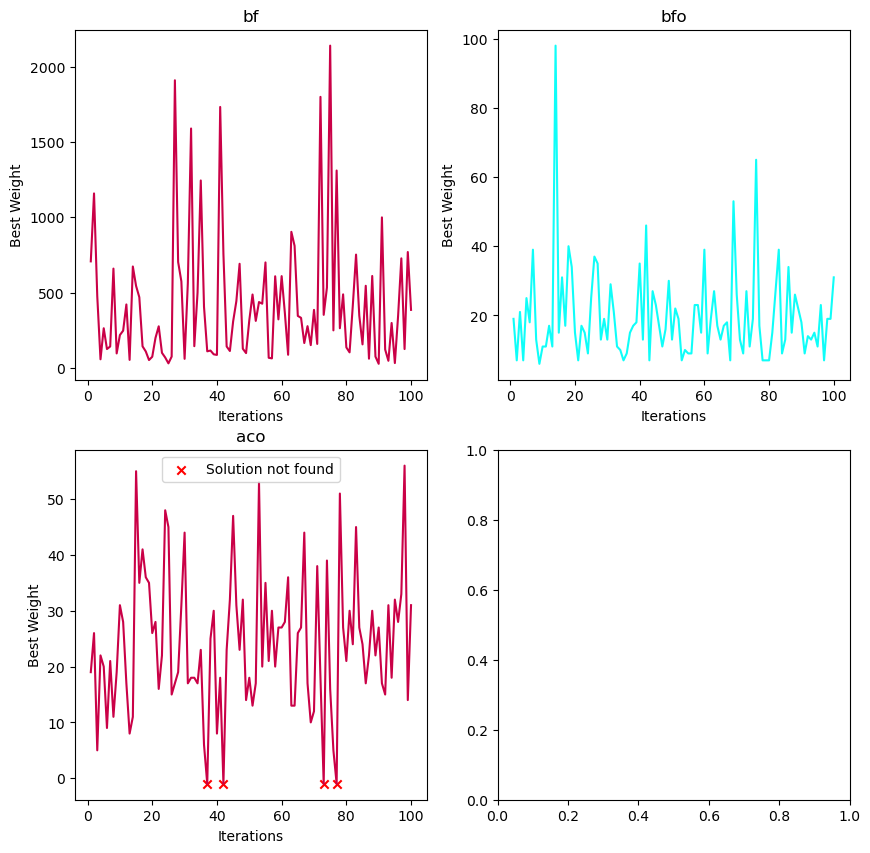

In [148]:
plot_solutions(num_iterations)

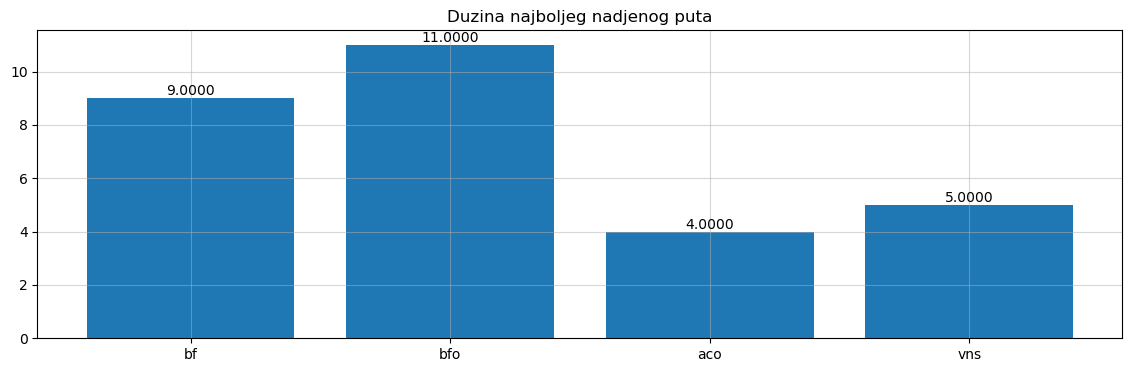

In [58]:
plot_metric(best_values, name, "Duzina najboljeg nadjenog puta")

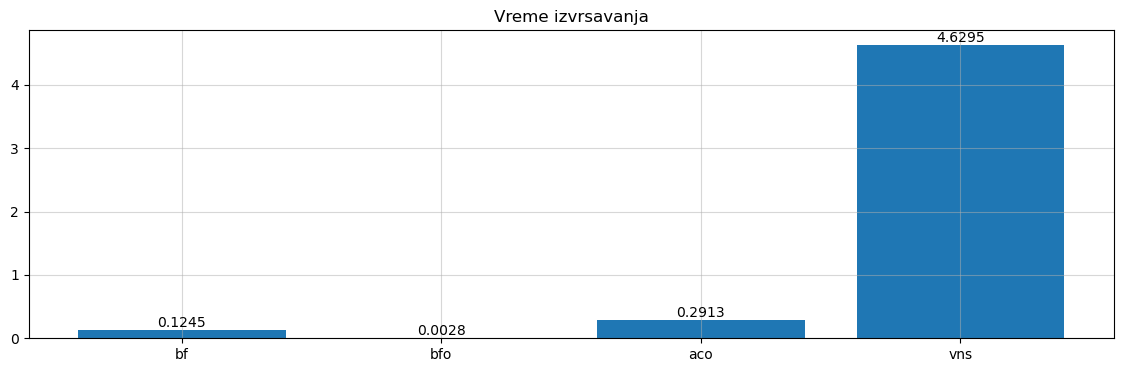

In [59]:
plot_metric(times, name, "Vreme izvrsavanja")

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

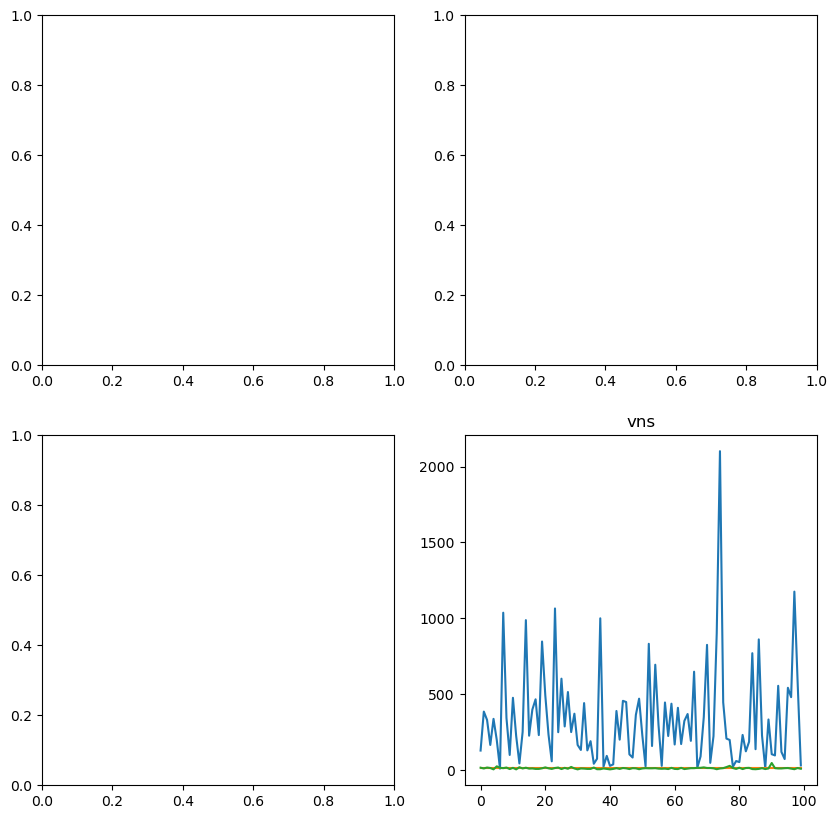

In [60]:
plot_solutions()